In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from fixed_processing import cropNalign, crop
from segmentation_routines import *
import h5py

In [2]:
root_dir="E:\\Rich\\Data\\ID_Trial_NoBorder\\CT\\tall"
scan_name="tall_rotated.raw"    #with extension
file_path=os.path.join(root_dir, scan_name)

In [3]:
img_params=create_img_dict(os.path.join(root_dir, (scan_name[:-4]+'_imgParams.pickle')))

In [4]:
print(img_params)

{'shape': (4415, 1048, 848), 'mask thresh': 18227, 'min pore': 4, 'mask max hole': 15, 'kernel 1': 7, 'kernel 2': 5, 'edge trim': 21, 'encoding': 'uint16', 'gauss kernel': 7}


In [5]:
# try out making some changes: set the shape
img_params['shape']=(4415, 1048,848)

In [11]:
print(img_params)
check_changes(img_params, root_dir, scan_name)

{'shape': (4415, 1048, 848), 'mask thresh': 18228, 'min pore': 4, 'mask max hole': 15, 'kernel 1': 7, 'kernel 2': 5, 'edge trim': 21, 'encoding': 'uint16', 'gauss kernel': 7}
Parameters changed, overwriting...


In [6]:
import imageio
data=imageio.volread("E:\\Rich\\Data\\ID_Trial_NoBorder\\CT\\tall\\tall_rotated_cropped.tif", format='TIFF')

In [7]:
imgs=data[50:-50:int(len(data)/10)]
pores=np.zeros(imgs.shape)
mask=np.zeros(imgs.shape)
print(imgs.shape)

(10, 1048, 848)


In [8]:
for i, img in enumerate(imgs):
    mask[i], pores[i]=mask_and_pores(img, img_params, adapt=True, gauss=True)

E:\repos\CT\segmentation_routines.py:62: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  mask = remove_small_holes(labels, area_threshold=img_params['mask max hole'],
C:\Users\rw1816\AppData\Roaming\Python\Python39\site-packages\skimage\morphology\misc.py:220: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  out = remove_small_objects(out, area_threshold, connectivity, in_place)


In [9]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

<IPython.core.display.Javascript object>


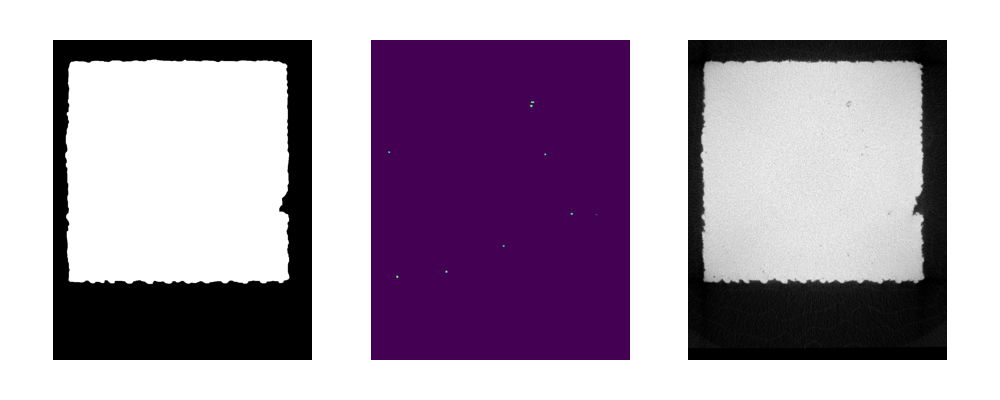

IntSlider(value=1, description='Z:', max=9)

IntSlider(value=18227, description='Mask Threshold:', max=32767)

IntSlider(value=4, description='Minimum pore size:', max=50)

IntSlider(value=15, description='Max mask hole:', max=50)

IntSlider(value=7, description='1st kernel:', max=50, min=1)

IntSlider(value=5, description='2nd kernel:', max=50, min=1)

IntSlider(value=21, description='Edge trim:', max=50, min=1)

IntSlider(value=7, description='Gauss kernel size:', max=50, min=1)

In [10]:
%matplotlib notebook
fig, ax = plt.subplots(1,3, figsize = (10,4))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9)
img1=ax[0].imshow(mask[1], cmap='gray')
img2=ax[1].imshow(pores[1])
img3=ax[2].imshow(imgs[1], cmap='gray')
for a in ax:
    a.set_axis_off()
#img3=ax[2].imshow(mask[1], cmap='viridis', alpha=0.2)
#img3=ax[2].imshow(pores[1], cmap='jet', alpha=0.2)

def animate(z):
    img1.set_data(mask[z])
    img2.set_data(pores[z])
    img3.set_data(imgs[z])
    return img1,img2,img3

def param_adjust(a,b,c,d,e,f,g):
    img_params['mask thresh']=a
    img_params['min pore']=b
    img_params['mask max hole']=c
    img_params['kernel 1']=d
    img_params['kernel 2']=e
    img_params['edge trim']=f
    img_params['gauss kernel']=g
    
    for i, img in enumerate(imgs):
        mask[i], pores[i]=mask_and_pores(img, img_params, adapt=True, gauss=True)
        
    img1.set_data(mask[z])
    img2.set_data(pores[z])
    img3.set_data(imgs[z])
    return img1, img2, img3, mask, pores

Z_slider = widgets.IntSlider(description='Z:',
                                value=1,
                                min=0,
                                max=imgs.shape[0]-1, step=1)

mask_thresh_slider= widgets.IntSlider(description='Mask Threshold:',
                                value=img_params['mask thresh'],
                                min=0,
                                max=32767, step=1)
min_pore_slider= widgets.IntSlider(description='Minimum pore size:',
                                value=img_params['min pore'],
                                min=0,
                                max=50, step=1)
mask_hole_slider= widgets.IntSlider(description='Max mask hole:',
                                value=img_params['mask max hole'],
                                min=0,
                                max=50, step=1)
kernel1= widgets.IntSlider(description='1st kernel:',
                                value=img_params['kernel 1'],
                                min=1,
                                max=50, step=1)
kernel2= widgets.IntSlider(description='2nd kernel:',
                                value=img_params['kernel 2'],
                                min=1,
                                max=50, step=1)
edge_trim= widgets.IntSlider(description='Edge trim:',
                                value=img_params['edge trim'],
                                min=1,
                                max=50, step=1)
gauss_kernel= widgets.IntSlider(description='Gauss kernel size:',
                                value=img_params['gauss kernel'],
                                min=1,
                                max=50, step=1)



app = widgets.interactive(animate,
               z = Z_slider)

app2 = widgets.interactive(param_adjust, a = mask_thresh_slider, b = min_pore_slider, 
                           c=mask_hole_slider, d=kernel1, e=kernel2, f=edge_trim, g=gauss_kernel)

display(Z_slider, mask_thresh_slider, min_pore_slider, mask_hole_slider, kernel1, kernel2, edge_trim, gauss_kernel)

In [67]:
%%time
_, _=mask_and_pores(img[100], img_params, adapt=True, gauss=True)

Wall time: 3 ms


In [77]:
%%time
mask=np.zeros(data.shape, dtype='uint8')
pores=np.zeros(data.shape, dtype='uint8')
for i, img in enumerate(data):
    mask[i], pores[i]=mask_and_pores(img, img_params, adapt=True, gauss=True)
    
# now try the full stack ^^^ 

Wall time: 5min 40s


<IPython.core.display.Javascript object>


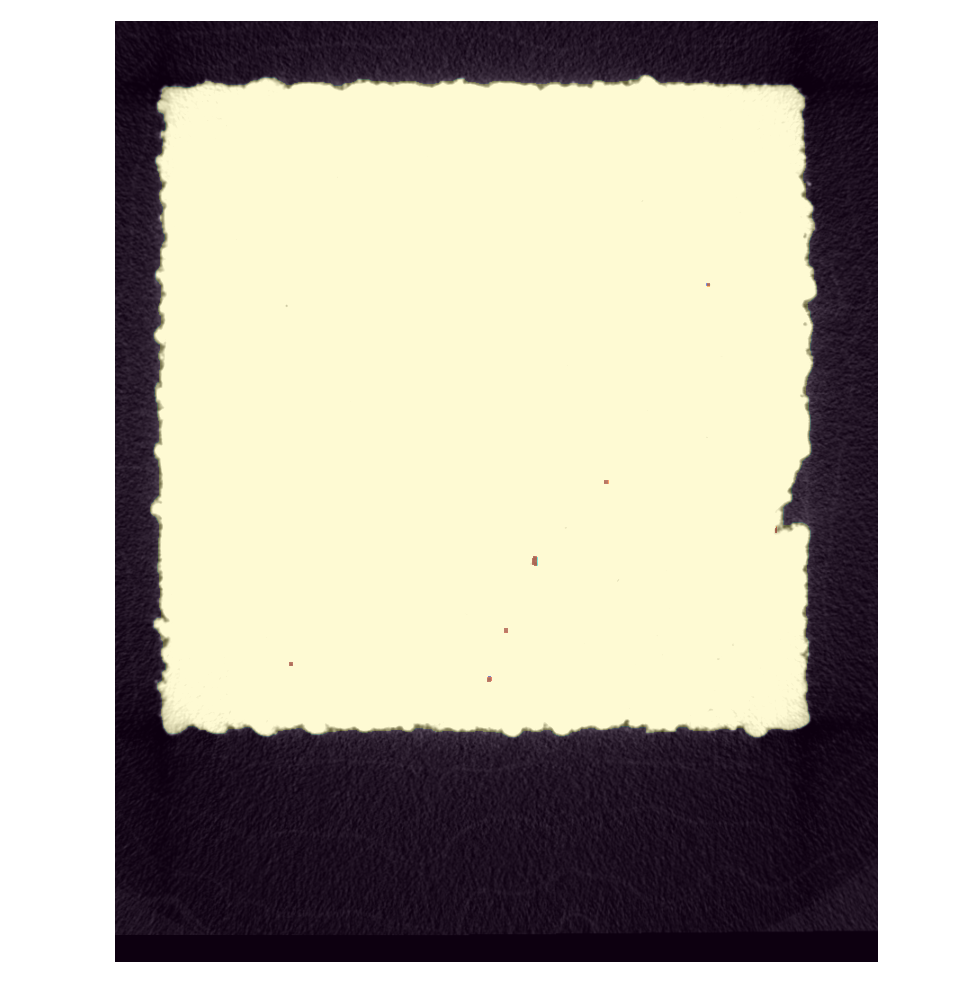

C:\Users\rw1816\AppData\Local\Temp/ipykernel_13480/1636851387.py:10: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  my_cmap.set_under('k', alpha=0)


IntSlider(value=1, description='Z:', max=4414)

In [110]:
# if we are happy, proceed to check on a bigger plot
import matplotlib.cm as cm
%matplotlib widget
fig, ax = plt.subplots(figsize = (10,10))
plt.tight_layout()

#my_cmap = cm.jet
#my_cmap.set_under('k', alpha=0)
cmap = cm.get_cmap("jet").copy()
my_cmap.set_under('k', alpha=0)

img1=ax.imshow(data[1], cmap='gray')
img2=ax.imshow(mask[1], alpha=0.2)
img3=ax.imshow(pores[1], interpolation=None, cmap=my_cmap, clim=[.9, 1], alpha=0.5)
ax.set_axis_off()
#img3=ax[2].imshow(mask[1], cmap='viridis', alpha=0.2)
#img3=ax[2].imshow(pores[1], cmap='jet', alpha=0.2)

def animate(z):
    img1.set_data(data[z])
    img2.set_data(mask[z])
    img3.set_data(pores[z])
    return img1,img2,img3

Z_slider = widgets.IntSlider(description='Z:', value=1, min=0, max=data.shape[0]-1, step=1)
app = widgets.interactive(animate, z = Z_slider)
display(Z_slider)

In [99]:
masked_data=pores[1]
masked_data = np.ma.masked_where(masked_data < 0, masked_data)
plt.imshow(masked_data)

In [116]:
# It's looking good!  dump to disk
out_name=os.path.join(root_dir, (scan_name[:(scan_name.find("."))]+"_SEGMENTED"+".h5"))
with h5py.File(out_name, 'w') as f:
    d1=f.create_dataset('pores', shape=pores.shape, dtype='uint8', data=pores.astype('uint8'))
    d2=f.create_dataset('mask', shape=mask.shape, dtype='uint8', data=mask.astype('uint8'))

In [150]:
# print total porosity %
#sum(sum(sum(pores==1)))
#sum_mask=np.zeros((1), dtype='uint64')
sum_mask1=sum(sum(sum(mask[20:2000]==1)))
sum_mask2=sum(sum(sum(mask[2000:-20]==1)))
sum_pores1=sum(sum(sum(pores[20:2000]==1)))
sum_pores2=sum(sum(sum(pores[2000:-20]==1)))
(np.uint32(sum_pores1+sum_pores2)/np.uint32(sum_mask1+sum_mask2))*100


C:\Users\rw1816\AppData\Local\Temp/ipykernel_13480/4106999346.py:8: RuntimeWarning: overflow encountered in long_scalars
  (np.uint32(sum_pores1+sum_pores2)/np.uint32(sum_mask1+sum_mask2))*100


0.041026203511394216

In [144]:
print(sum_pores1,sum_pores2,sum_mask1,sum_mask2)

348702 650068 1197785233 1236683264


<IPython.core.display.Javascript object>


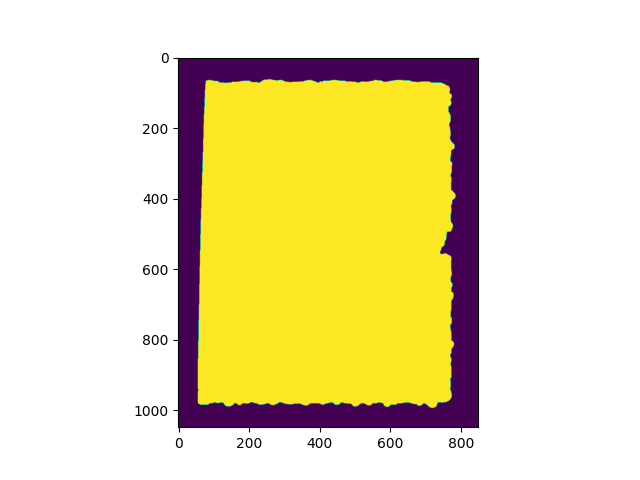

In [123]:
%matplotlib widget
plt.imshow(mask[100])

In [134]:
np.uint64(-1838118789)

18446744071871432827

In [149]:
np.uint32(sum_mask1+sum_mask2)

C:\Users\rw1816\AppData\Local\Temp/ipykernel_13480/1857738932.py:1: RuntimeWarning: overflow encountered in long_scalars
  np.uint32(sum_mask1+sum_mask2)


2434468497